In [1]:
#loading all of the libraries needed
set.seed(1231)
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(dplyr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#getting the data from online

download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland_regression.csv")
heart_disease_data <- read_csv("data/cleveland_regression.csv", col_names = FALSE) 
head(heart_disease_data, n = 10)
nrow(heart_disease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


[1] 303

In [3]:
#renaming the columns

heart_disease_data <- read_csv("data/cleveland_regression.csv", col_names = FALSE) |>
                       rename( age = X1,
                               sex = X2,
                               cp = X3,
                               trestbps = X4,
                               chol = X5,
                               fbs = X6,
                               restecg = X7,
                              thalach = X8,
                              exang =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              num = X14)
heart_disease_data$ca <- as.numeric(heart_disease_data$ca)
heart_disease_data$thal <- as.numeric(heart_disease_data$thal)
head(heart_disease_data, n = 10)  

# age: age of the patient
# sex: sex of the patient (1 = male, 0 = female)
# cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
# trestbps: resting blood pressure (in mm Hg) on admission to the hospital
# chol: serum cholesterol level (in mg/dl)
# fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
# restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes, 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# num: diagnosis of heart disease (angiographic disease status) (0 = no disease, 1-4 = disease present)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [4]:
#splitting the data 75% (training) to 25% (testing)

heart_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)
heart_training 
heart_testing

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
54,1,4,140,239,0,0,160,0,1.2,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
48,1,2,110,229,0,0,168,0,1.0,3,0,7,1
48,0,3,130,275,0,0,139,0,0.2,1,0,3,0
50,0,3,120,219,0,0,158,0,1.6,2,0,3,0
57,1,4,150,276,0,2,112,1,0.6,2,1,6,1


In [5]:
#linear regression specification

linear_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

In [6]:
#recipies for all age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

lm_recipe_age <- recipe(num ~ age, data = heart_training)

lm_recipe_sex <- recipe(num ~ sex, data = heart_training)

lm_recipe_cp <- recipe(num ~ cp, data = heart_training)

lm_recipe_trestbps <- recipe(num ~ trestbps, data = heart_training)

lm_recipe_chol <- recipe(num ~ chol, data = heart_training)

lm_recipe_fbs <- recipe(num ~ fbs, data = heart_training)

lm_recipe_restecg <- recipe(num ~ restecg, data = heart_training)

lm_recipe_thalach <- recipe(num ~ thalach, data = heart_training)

lm_recipe_exang <- recipe(num ~ exang, data = heart_training)

lm_recipe_oldpeak <- recipe(num ~ oldpeak, data = heart_training)

lm_recipe_slope <- recipe(num ~ slope, data = heart_training)

lm_recipe_ca <- recipe(num ~ ca, data = heart_training)

lm_recipe_thal <- recipe(num ~ thal, data = heart_training)




In [7]:
#workflows age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

lm_fit_age <- workflow() |>
      add_recipe(lm_recipe_age) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_sex <- workflow() |>
      add_recipe(lm_recipe_sex) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_cp <- workflow() |>
      add_recipe(lm_recipe_cp) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_trestbps <- workflow() |>
      add_recipe(lm_recipe_trestbps) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_chol <- workflow() |>
      add_recipe(lm_recipe_chol) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_fbs <- workflow() |>
      add_recipe(lm_recipe_fbs) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_restecg <- workflow() |>
      add_recipe(lm_recipe_restecg) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_thalach <- workflow() |>
      add_recipe(lm_recipe_thalach) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_exang <- workflow() |>
      add_recipe(lm_recipe_exang) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_oldpeak <- workflow() |>
      add_recipe(lm_recipe_oldpeak) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_slope <- workflow() |>
      add_recipe(lm_recipe_slope) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_ca <- workflow() |>
      add_recipe(lm_recipe_ca) |>
      add_model(linear_spec) |>
      fit(data = heart_training)

lm_fit_thal <- workflow() |>
      add_recipe(lm_recipe_thal) |>
      add_model(linear_spec) |>
      fit(data = heart_training)



[1] 53.97293

`geom_smooth()` using formula 'y ~ x'



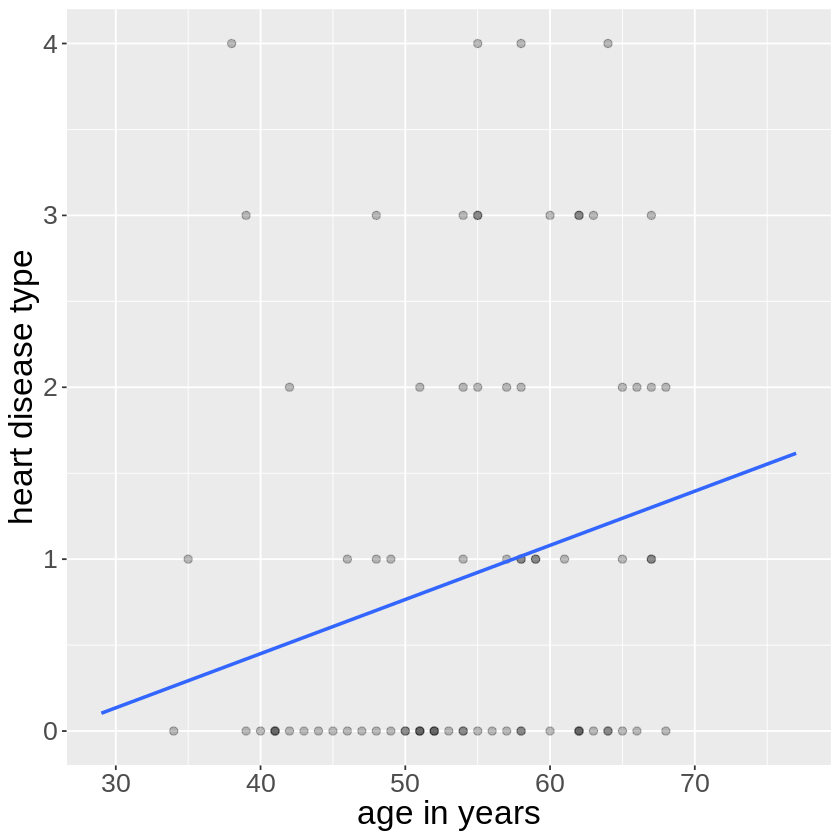

In [8]:
#predictions and metrics age        	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

lm_test_results_age <- lm_fit_age |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = age)
lm_rmspe_age <- lm_test_results_age |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_age

lm_predictions_age <- heart_testing |>
    ggplot(aes(x = age, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= age, y= num),method = "lm", se = FALSE) +
        xlab("age in years") +
        ylab("heart disease type") +
       theme(text = element_text(size = 20))

lm_predictions_age



[1] 1.320451

`geom_smooth()` using formula 'y ~ x'



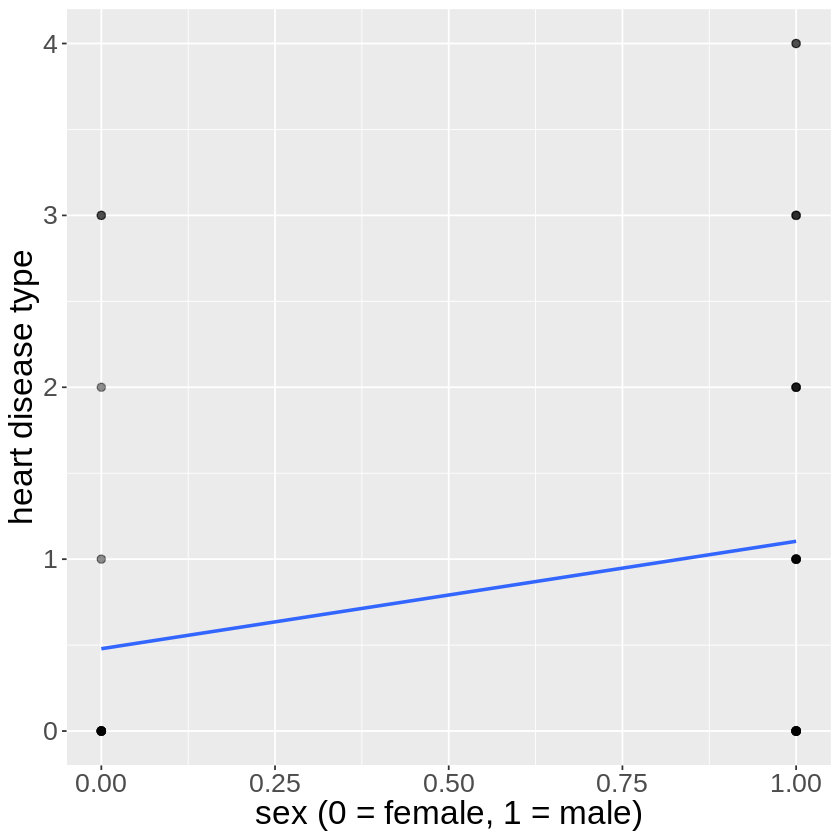

In [9]:
#sex
lm_test_results_sex <- lm_fit_sex |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = sex)
lm_rmspe_sex <- lm_test_results_sex |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_sex

lm_predictions_sex <- heart_testing |>
    ggplot(aes(x = sex, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= sex, y= num),method = "lm", se = FALSE) +
        xlab("sex (0 = female, 1 = male)") +
        ylab("heart disease type") +
        theme(text = element_text(size = 20))

lm_predictions_sex

[1] 2.519157

`geom_smooth()` using formula 'y ~ x'



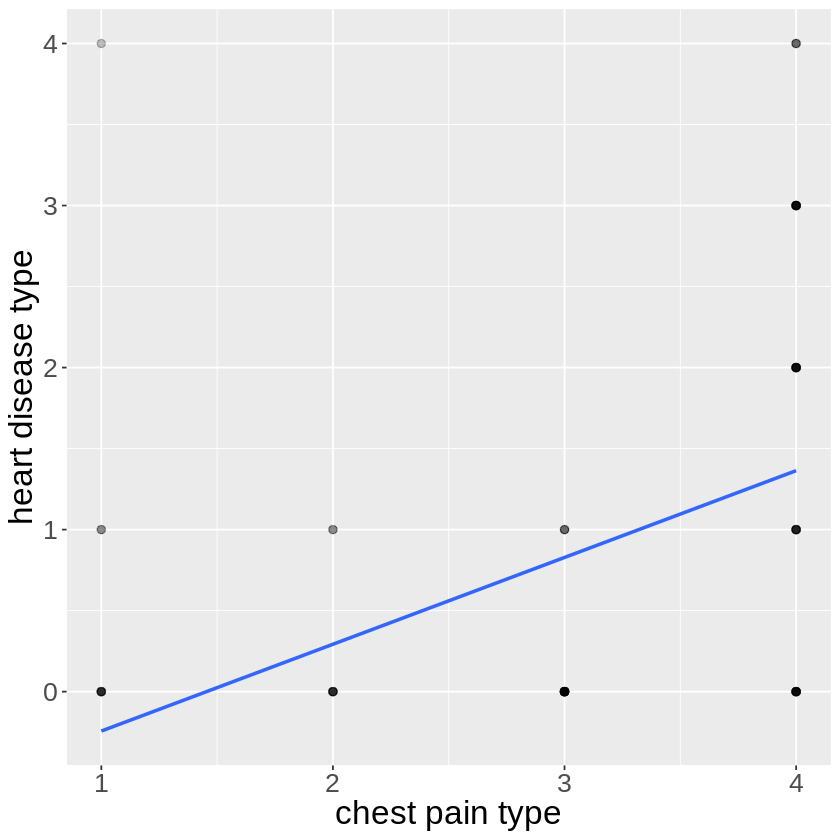

In [10]:
#cp 
lm_test_results_cp <- lm_fit_cp |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = cp)
lm_rmspe_cp <- lm_test_results_cp |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_cp

lm_predictions_cp <- heart_testing |>
    ggplot(aes(x = cp, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= cp, y= num),method = "lm", se = FALSE) +
        xlab("chest pain type") +
        ylab("heart disease type") +
       theme(text = element_text(size = 20))

lm_predictions_cp

[1] 131.8014

`geom_smooth()` using formula 'y ~ x'



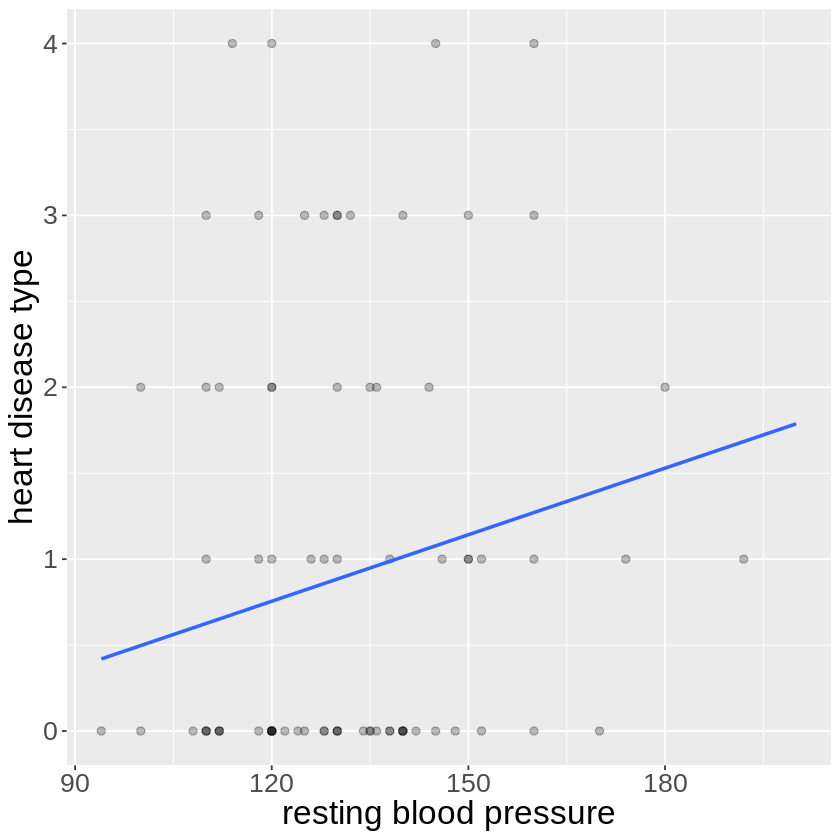

In [11]:
#trestbps
lm_test_results_trestbps <- lm_fit_trestbps |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = trestbps)
lm_rmspe_trestbps <- lm_test_results_trestbps |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_trestbps

lm_predictions_trestbps <- heart_testing |>
    ggplot(aes(x = trestbps, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= trestbps, y= num),method = "lm", se = FALSE) +
        xlab("resting blood pressure") +
        ylab("heart disease type") +
       theme(text = element_text(size = 20))

lm_predictions_trestbps

[1] 247.6382

`geom_smooth()` using formula 'y ~ x'



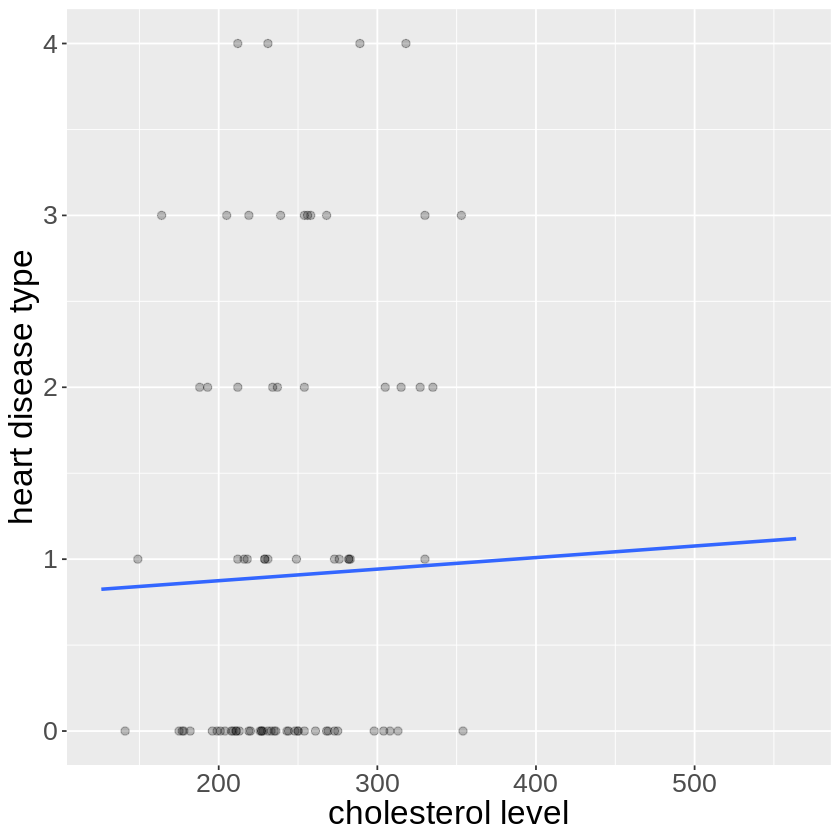

In [12]:
#chol 
lm_test_results_chol <- lm_fit_chol |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = chol)
lm_rmspe_chol <- lm_test_results_chol |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_chol

lm_predictions_chol <- heart_testing |>
    ggplot(aes(x = chol, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= chol, y= num),method = "lm", se = FALSE) +
        xlab("cholesterol level") +
        ylab("heart disease type") +
       theme(text = element_text(size = 20))

lm_predictions_chol

[1] 1.581139

`geom_smooth()` using formula 'y ~ x'



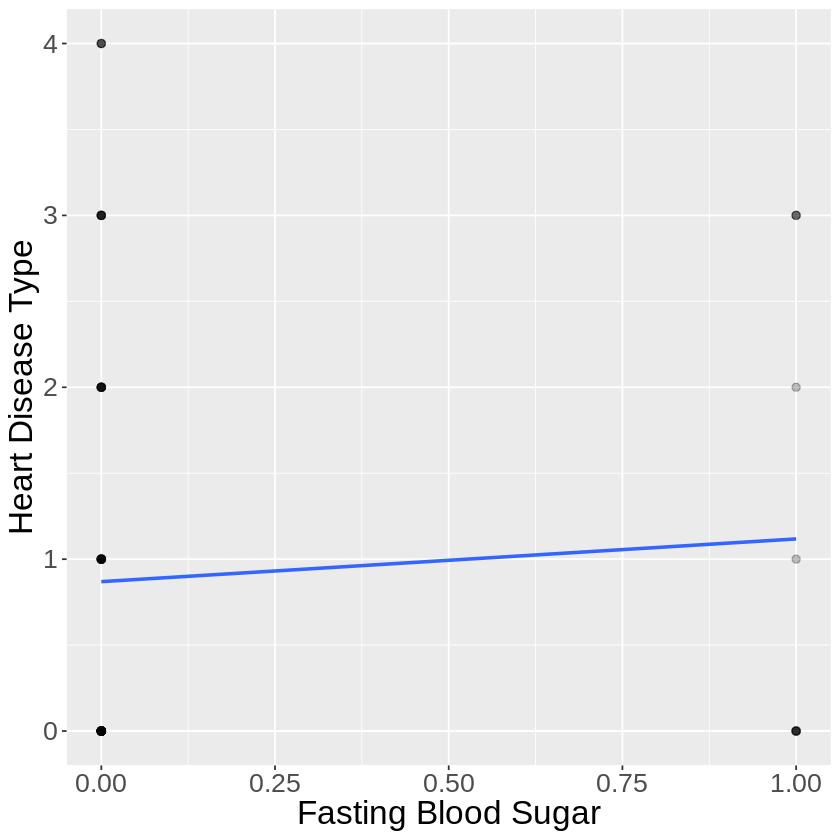

In [13]:
#fbs
lm_test_results_fbs <- lm_fit_fbs |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = fbs)
lm_rmspe_fbs <- lm_test_results_fbs |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_fbs

lm_predictions_fbs <- heart_testing |>
    ggplot(aes(x = fbs, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= fbs, y= num),method = "lm", se = FALSE) +
        xlab("Fasting Blood Sugar") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_fbs

[1] 1.57301

`geom_smooth()` using formula 'y ~ x'



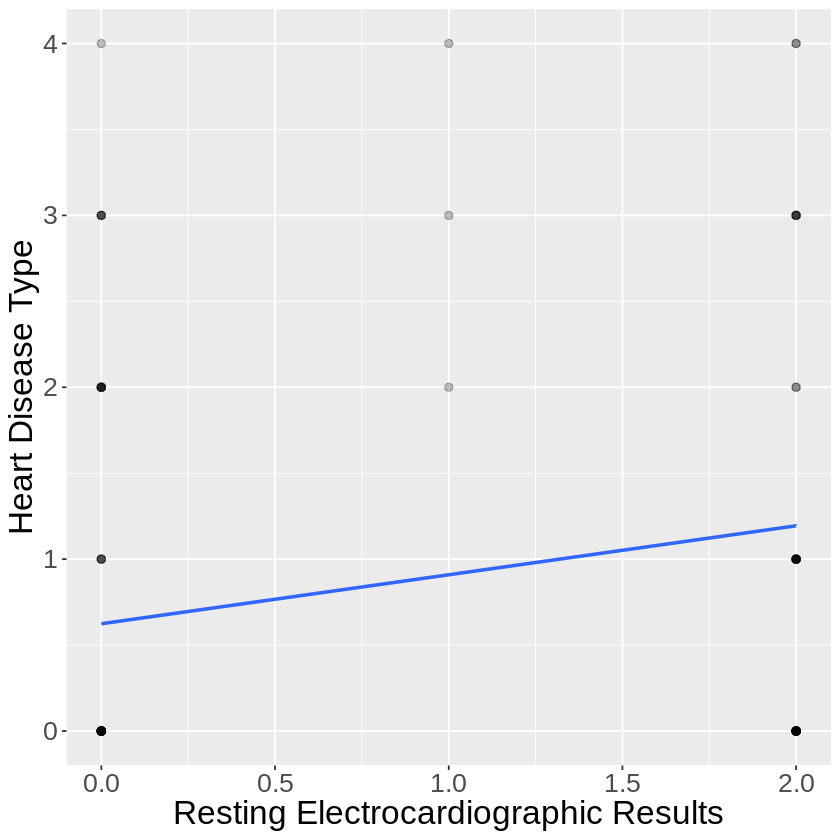

In [14]:
#restecg 
lm_test_results_restecg <- lm_fit_restecg |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = restecg)
lm_rmspe_restecg <- lm_test_results_restecg |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_restecg

lm_predictions_restecg <- heart_testing |>
    ggplot(aes(x = restecg, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= restecg, y= num),method = "lm", se = FALSE) +
        xlab("Resting Electrocardiographic Results") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_restecg

[1] 148.2824

`geom_smooth()` using formula 'y ~ x'



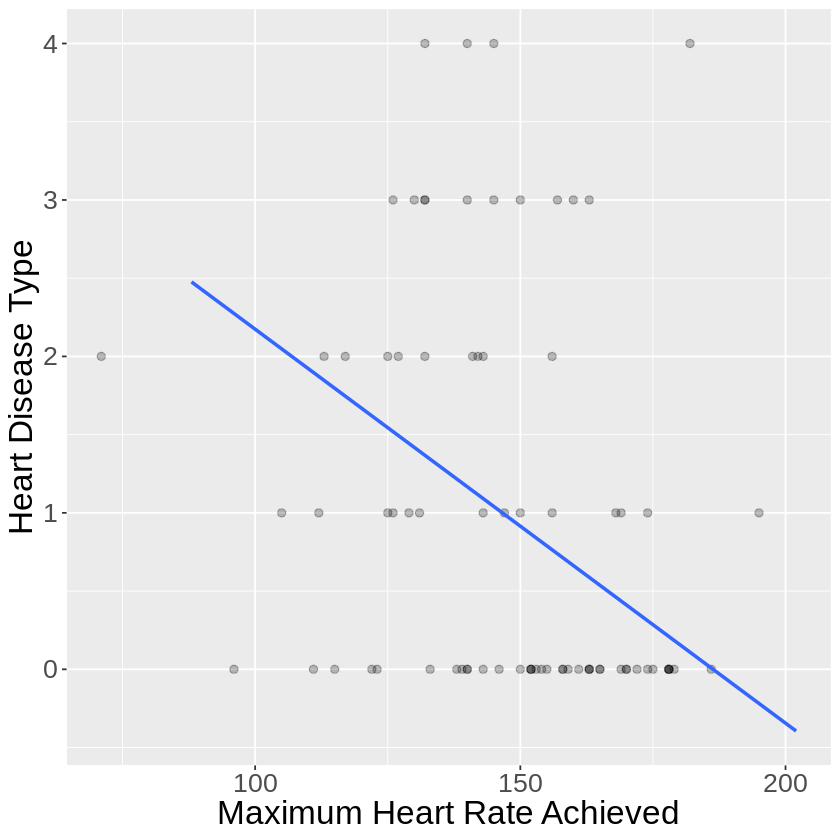

In [15]:
#thalach
lm_test_results_thalach <- lm_fit_thalach |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = thalach)
lm_rmspe_thalach <- lm_test_results_thalach |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_thalach

lm_predictions_thalach <- heart_testing |>
    ggplot(aes(x = thalach, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= thalach, y= num),method = "lm", se = FALSE) +
        xlab("Maximum Heart Rate Achieved") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_thalach

[1] 1.414214

`geom_smooth()` using formula 'y ~ x'



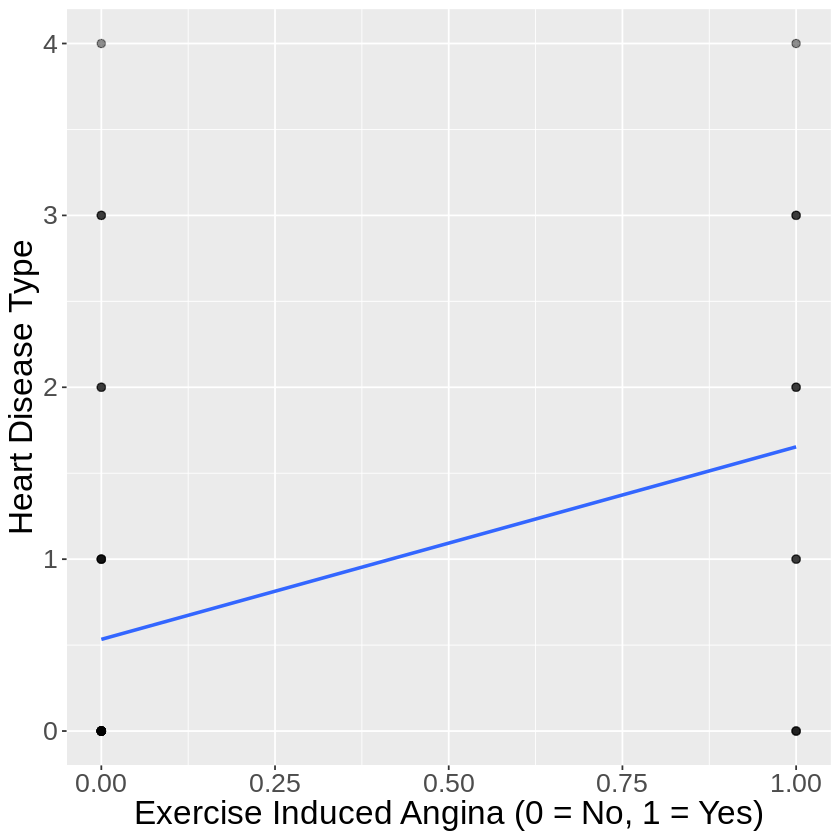

In [16]:
#exhang 
lm_test_results_exang <- lm_fit_exang |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = exang)
lm_rmspe_exang <- lm_test_results_exang |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_exang

lm_predictions_exang <- heart_testing |>
    ggplot(aes(x = exang, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= exang, y= num),method = "lm", se = FALSE) +
        xlab("Exercise Induced Angina (0 = No, 1 = Yes)") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_exang

[1] 1.197647

`geom_smooth()` using formula 'y ~ x'



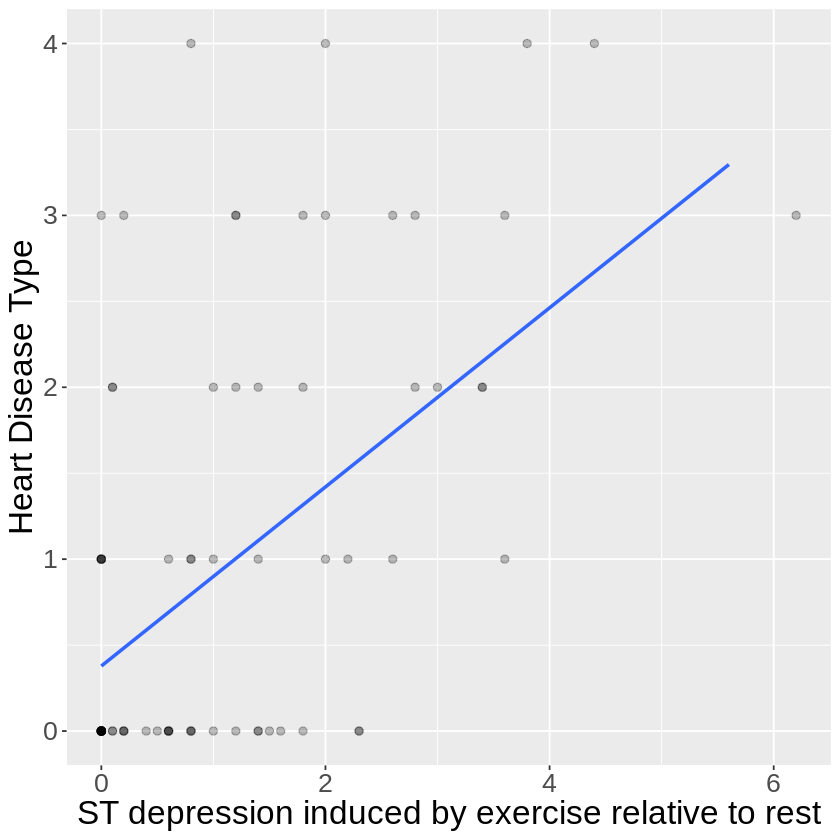

In [17]:
#oldpeak
lm_test_results_oldpeak <- lm_fit_oldpeak |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = oldpeak)
lm_rmspe_oldpeak <- lm_test_results_oldpeak |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_oldpeak

lm_predictions_oldpeak <- heart_testing |>
    ggplot(aes(x = oldpeak, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= oldpeak, y= num),method = "lm", se = FALSE) +
        xlab("ST depression induced by exercise relative to rest") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_oldpeak

[1] 1.305806

`geom_smooth()` using formula 'y ~ x'



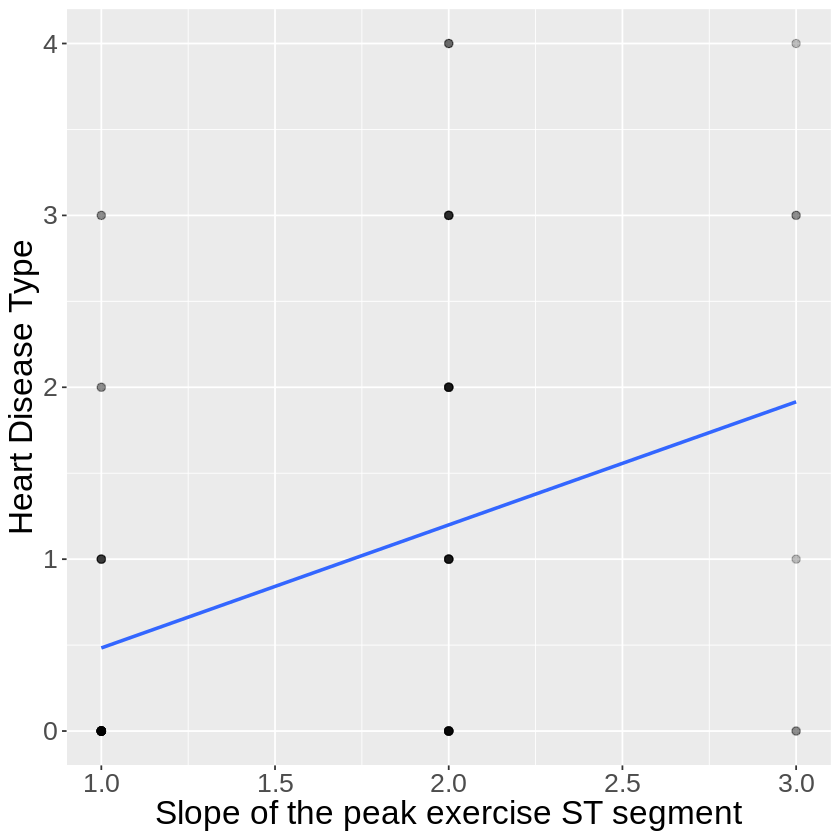

In [18]:
#slope
lm_test_results_slope <- lm_fit_slope |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = slope)
lm_rmspe_slope <- lm_test_results_slope |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_slope

lm_predictions_slope <- heart_testing |>
    ggplot(aes(x = slope, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= slope, y= num),method = "lm", se = FALSE) +
        xlab("Slope of the peak exercise ST segment") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_slope

[1] 1.305806

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”


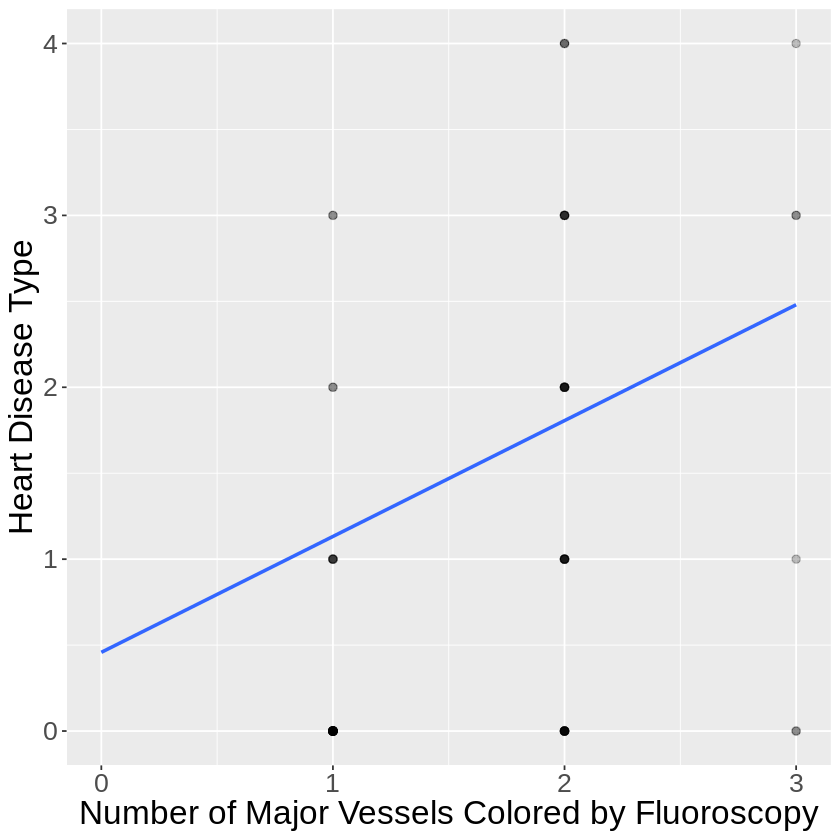

In [19]:
#ca 
lm_test_results_ca <- lm_fit_ca |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = slope)
lm_rmspe_ca <- lm_test_results_ca |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_ca

lm_predictions_ca <- heart_testing |>
    ggplot(aes(x = slope, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= ca, y= num),method = "lm", se = FALSE) +
        xlab("Number of Major Vessels Colored by Fluoroscopy") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_ca

[1] 1.305806

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”


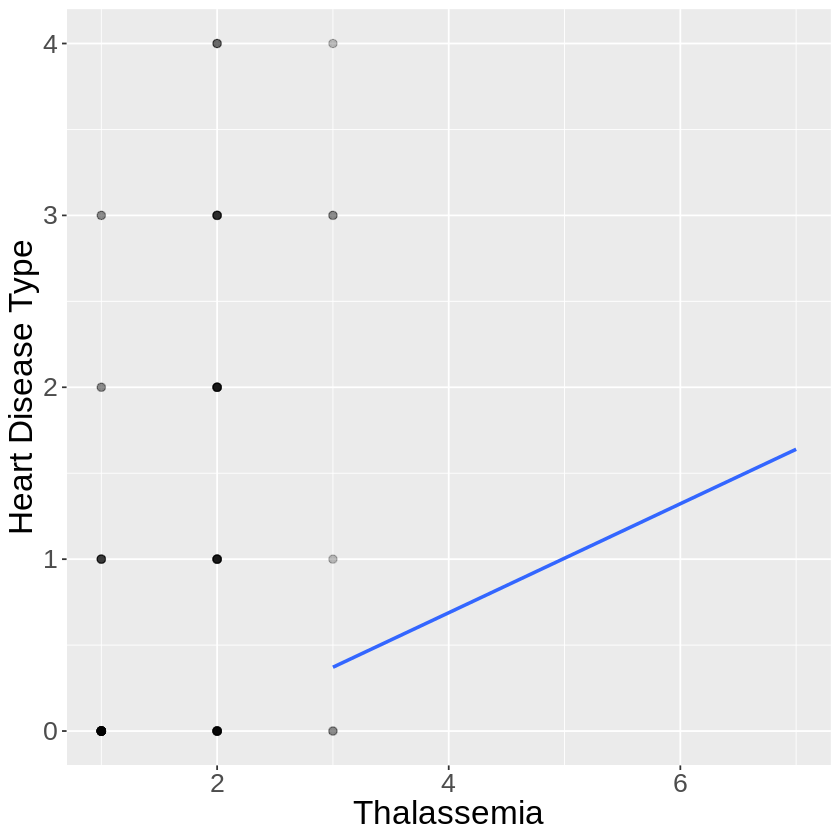

In [20]:
#thal
lm_test_results_thal <- lm_fit_thal |>
        predict(heart_testing) |>
        bind_cols(heart_testing) |>
        metrics(truth = num, estimate = slope)
lm_rmspe_thal <- lm_test_results_thal |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_thal

lm_predictions_thal <- heart_testing |>
    ggplot(aes(x = slope, y = num)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(data = heart_training, aes(x= thal, y= num),method = "lm", se = FALSE) +
        xlab("Thalassemia") +
        ylab("Heart Disease Type") +
       theme(text = element_text(size = 20))

lm_predictions_thal

In [13]:
#logistic regression specification
#use classification because it is either heart disease or not when it selects a class.
    
logistic_spec <- logistic_reg() |>
    set_engine("glm", family = "binomial" ) |>
    set_mode("classification")